In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.models.MultyModalGPT2 import MultyModalGPT2
from src.data.shemas import ConfigData, ConfigTraining
from src.data.datasets import AlfredDataset
from src.pipelines.train_pipeline import train_loop

from torch.optim import AdamW
import matplotlib.pyplot as plt

In [3]:
train_cfg = ConfigTraining(
    train_data_path = "../data/raw/json_feat_2.1.0/json_feat_2.1.0/train/",
    test_data_path = "../data/raw/json_feat_2.1.0/json_feat_2.1.0/valid_seen/",
    epoch_num=10,
    data_samples_num=500
)

cfg = ConfigData(
    device="cuda",
    train_cfg=train_cfg
)

In [4]:
train_dataset = AlfredDataset(cfg, promt_type="instruction2next_step")
test_dataset = AlfredDataset(cfg, dataset_type="test", promt_type="instruction2next_step")

In [5]:
train_dataset[0]

{'promts': ['<|endoftext|>Task: pick up the alarm clock and turn on the lamp. turn left and face the dresser. pick up the alarm clock from the dresser. turn left, look and then face the lamp. turn the lamp on.. Your previous actions: . What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and turn on the lamp. turn left and face the dresser. pick up the alarm clock from the dresser. turn left, look and then face the lamp. turn the lamp on.. Your previous actions: lookdown. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and turn on the lamp. turn left and face the dresser. pick up the alarm clock from the dresser. turn left, look and then face the lamp. turn the lamp on.. Your previous actions: lookdown. moveahead. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and turn on the lamp. turn left and face the dresser. pick up the alarm clock from the dresser. turn left, look and then face

In [6]:
mmgpt = MultyModalGPT2(cfg)
mmgpt.train()
# mmgpt.set_bias_training()
opt = AdamW(mmgpt.get_trainable_params())

In [7]:
history = train_loop(mmgpt, train_dataset, test_dataset, opt, cfg)

Epoch 1/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 2/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 3/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 4/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 5/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 6/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 7/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 8/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 9/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 10/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

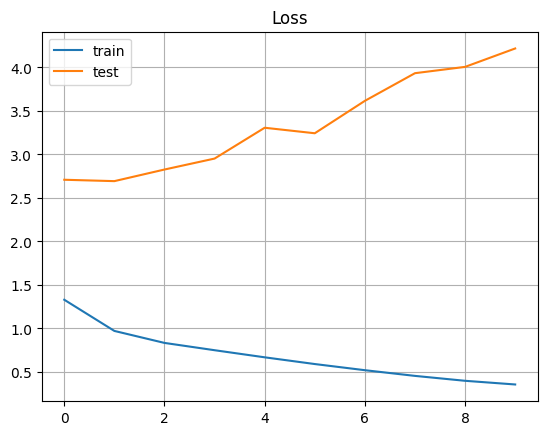

In [8]:
plt.title("Loss")
plt.plot(history["train_loss"], label="train")
plt.plot(history["test_loss"], label="test")
plt.grid()
plt.legend()

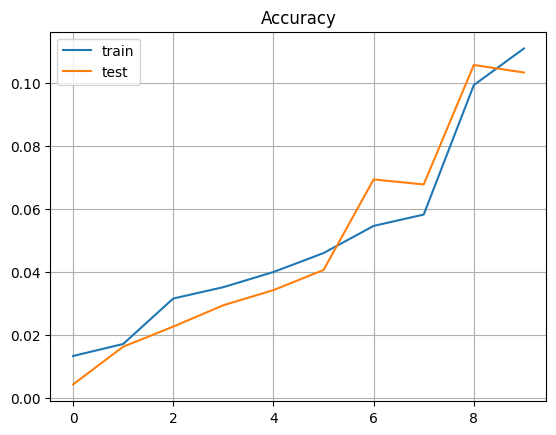

In [9]:
plt.title("Accuracy")
plt.plot(history["train_acc"], label="train")
plt.plot(history["test_acc"], label="test")
plt.grid()
plt.legend()

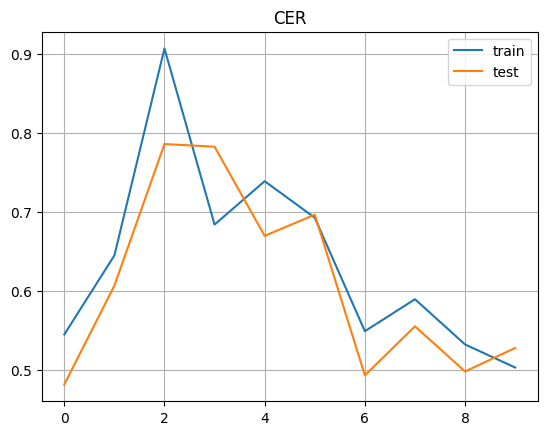

In [10]:
plt.title("CER")
plt.plot(history["train_cer"], label="train")
plt.plot(history["test_cer"], label="test")
plt.grid()
plt.legend()

In [11]:
history

{'train_loss': [1.329516935288906,
  0.9710880427360534,
  0.8333054056167603,
  0.7494694634675979,
  0.6678133026361466,
  0.5904713751077652,
  0.5197304433584213,
  0.45428360015153885,
  0.3978424445092678,
  0.35556228774786],
 'train_acc': [0.0134,
  0.0172,
  0.0316,
  0.0352,
  0.04,
  0.046,
  0.0546,
  0.0582,
  0.0992,
  0.1108],
 'train_cer': [0.54520476,
  0.6452513,
  0.9072275,
  0.68435305,
  0.73925316,
  0.69300735,
  0.54939896,
  0.58990073,
  0.5326125,
  0.50344807],
 'test_loss': [2.7087290294141884,
  2.6929237313004606,
  2.826336862556488,
  2.9522950497281504,
  3.30655253337199,
  3.2431967422306776,
  3.6158264668814213,
  3.9336837703488263,
  4.006131207563013,
  4.217747459373626],
 'test_acc': [0.004382470119521913,
  0.016334661354581673,
  0.02270916334661355,
  0.02948207171314741,
  0.034262948207171316,
  0.04063745019920319,
  0.06932270916334661,
  0.06772908366533864,
  0.10557768924302789,
  0.10318725099601593],
 'test_cer': [0.4819732,
  0.6